In [1]:
# imports dependancies 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# creates engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [175]:
# checks table columns names
first_row = session.query(Measurement).first()
first_row.__dict__
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x203aad2fdc8>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

In [171]:
# calculates the date for for the first 12 months
dates = session.query(Measurement.date).all()
last_date= str(dates[-1])
last_date = last_date[2:-3]
year_one = str(int(last_date[0:4]) - 1) + last_date[4:]
year_one

'2016-08-23'

# Exploratory Climate Analysis

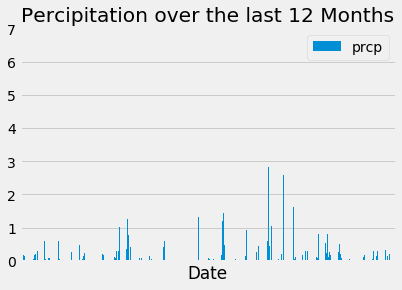

In [172]:
# creates a dataframe for date and prcp for the last 12 months 
percip_df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).\
                      filter(Measurement.date > year_one))
percip_df = percip_df.sort_values(by="date")
#  Plots a bar graph based on above database
fig = percip_df.plot(kind="bar", title="Percipitation over the last 12 Months")
fig.axes.xaxis.set_ticks([])
fig.set_xlabel("Date")
fig

In [173]:
# Uses Pandas to calcualte the summary statistics for the precipitation data
percip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [177]:
# finds how many station are in the data 
unq_stat = session.query(Station.station)
unq_stat.count()

9

In [128]:
# finds the most active station 
stat_list = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.prcp))
for row in stat:
    print(row)

('USC00518838', 342)
('USC00517948', 683)
('USC00511918', 1932)
('USC00514830', 1937)
('USC00516128', 2484)
('USC00519523', 2572)
('USC00519397', 2685)
('USC00513117', 2696)
('USC00519281', 2772)


In [129]:
# Uses the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
highest_stat = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
             filter(Measurement.station == stat_list[-1][0])
for row in highest_stat:
    print(row)

(54.0, 85.0, 71.66378066378067)


Text(0.5, 1.0, 'Station Temp Histogram')

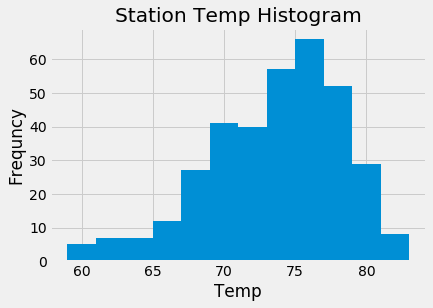

In [174]:
# creates a dataframe for the most active stationg over the last 12 months 
stat_df = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).\
                      filter(Measurement.date > year_one).\
                      filter(Measurement.station == stat_list[-1][0]))
bins = 12
# plots histogram of above data set
plt.hist(stat_df["tobs"], bins=bins)
plt.ylabel("Frequncy")
plt.xlabel("Temp")
plt.title("Station Temp Histogram")
